In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [15]:
PATH_TO_SAMSUNG_DATA = '../datasets'

In [16]:
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_test_labels.txt")).astype(int)

In [17]:
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [19]:
X = pd.DataFrame(X_train).merge(pd.DataFrame(X_test), how='outer')

In [22]:
y = pd.DataFrame(y_train).merge(pd.DataFrame(y_test), how='outer')

In [39]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [40]:
n_classes = np.unique(y).size

In [46]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
pca = PCA(random_state=RANDOM_STATE, n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

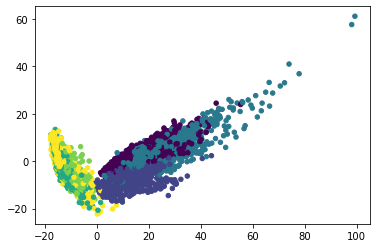

In [56]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

In [57]:
kmeans = KMeans(n_clusters=n_classes, n_init=100,
                random_state=RANDOM_STATE, n_jobs=1)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


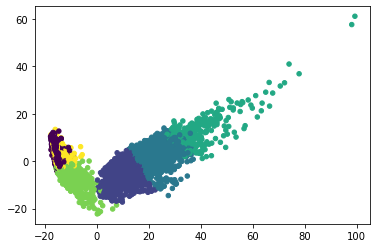

In [58]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,
            cmap='viridis');

In [59]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
             'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,904,740,78,0,0,1722
going up the stairs,0,1242,295,5,2,0,1544
going down the stairs,0,320,890,196,0,0,1406
sitting,91,1,0,0,450,1235,1777
standing,0,0,0,0,562,1344,1906
laying,1558,5,0,0,329,52,1944
all,1649,2472,1925,279,1343,2631,10299


In [62]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [63]:
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100,
                    random_state=RANDOM_STATE, n_jobs=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

<ipython-input-63-2be6905b13a2>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, n_classes + 1)):
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be remo

In [64]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [67]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                             linkage='ward').fit(X_pca)

In [68]:
print('KMeans: ARI =', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative CLustering: ARI =',
      metrics.adjusted_rand_score(y, ag.labels_))

KMeans: ARI = 0.4199036333641994
Agglomerative CLustering: ARI = 0.49362763373004886
